File is to test the training data set without concatenating with the testing data set
Also to show the initial training data set and how its biased

In [17]:
#import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from helper import get_stats

In [18]:
PATH = "./dataset/customer_churn_dataset-training-master.csv"

df = pd.read_csv(PATH)
df.drop(199295, inplace=True) #drops the one null column

In [19]:
#Check for null values
nan_count = np.sum(df.isnull(), axis=0)
nan_count

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [20]:
df.drop(columns=["CustomerID", "Gender"], inplace=True)

In [21]:
df_subscription_type = pd.get_dummies(df['Subscription Type'], prefix='Subscription Type')
df = df.join(df_subscription_type)
df.drop(columns='Subscription Type', inplace=True)

df_contract_length = pd.get_dummies(df['Contract Length'], prefix='Contract Length')
df = df.join(df_contract_length)
df.drop(columns='Contract Length', inplace=True)

In [22]:
corr_matrix = round(df.corr(),5)
corrs = corr_matrix['Churn']
corrs_sorted = corrs.sort_values(ascending=False)
corrs_sorted


Churn                         1.00000
Support Calls                 0.57427
Contract Length_Monthly       0.43355
Payment Delay                 0.31213
Age                           0.21839
Last Interaction              0.14962
Subscription Type_Basic       0.02053
Subscription Type_Standard   -0.00925
Subscription Type_Premium    -0.01107
Usage Frequency              -0.04610
Tenure                       -0.05192
Contract Length_Annual       -0.17596
Contract Length_Quarterly    -0.17624
Total Spend                  -0.42935
Name: Churn, dtype: float64

In [30]:
#grabs any random sample above age 50 to show that they always churn when age is above 50
age_above_50 = df['Age']>50
df[age_above_50].sample(n=100)

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
165809,61.0,8.0,7.0,6.0,7.0,987.00,22.0,1.0,False,False,True,False,False,True
238581,53.0,8.0,18.0,1.0,6.0,332.48,4.0,1.0,False,True,False,True,False,False
46816,55.0,1.0,3.0,5.0,4.0,256.00,4.0,1.0,True,False,False,False,True,False
214271,57.0,7.0,30.0,5.0,10.0,781.79,17.0,1.0,False,False,True,False,True,False
239577,64.0,23.0,9.0,9.0,29.0,544.74,20.0,1.0,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218935,61.0,35.0,23.0,7.0,4.0,657.72,15.0,1.0,True,False,False,True,False,False
219004,57.0,24.0,7.0,5.0,18.0,716.41,24.0,1.0,False,False,True,False,False,True
209718,63.0,20.0,11.0,6.0,18.0,489.47,19.0,1.0,False,True,False,True,False,False
238918,58.0,1.0,29.0,10.0,21.0,814.55,9.0,1.0,True,False,False,False,False,True


In [ ]:
filtered_df = df[df['Age'] > 50] #filters the data frame to only when age is above 50
churned = (filtered_df['Churn'] == 1).sum() #counts all the churn 
not_churned = (filtered_df['Churn'] == 0).sum() #counts all the not churn
churn_rate = (churned/len(filtered_df) * 100) #calculate the rate

print(f'Churn rate when age is above 50: {churn_rate}%')

Churn rate when age is above 50: 100.0%


<Axes: xlabel='Age', ylabel='Churn'>

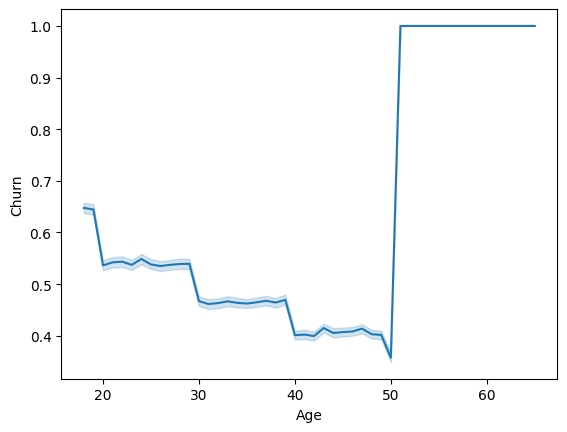

In [24]:
sns.lineplot(x=df['Age'], y=df['Churn'])


In [25]:
y = df['Churn']
X = df.drop(columns='Churn')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1234)

In [26]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)
lg_loss = log_loss(y_test, probabilities)
acc_score = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
# print('Log loss=' + str(lg_loss) + ', accuracy score: ' + str(acc_score), ', recall : ' + recall)
print(f'Log Loss: {lg_loss}, accuracy score: {acc_score}, precision: {precision}, recall: {recall}')
print('F1 Score: ' + str((2*precision*recall)/(precision+recall)))


Log Loss: 0.25695506802774937, accuracy score: 0.8895727788279774, precision: 0.920881971465629, recall: 0.8808580461840156
F1 Score: 0.9004254622811324


In [27]:
from sklearn.tree import DecisionTreeClassifier
y = df['Churn']
X = df.drop(columns='Churn')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,stratify=y,random_state=1234)

dt = DecisionTreeClassifier(criterion='log_loss', max_depth=7, min_samples_leaf=4, random_state=1234)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
probabilities = dt.predict_proba(X_test)

get_stats(y_test, y_pred, probabilities)



Log Loss: 0.07653992185159593, accuracy score: 0.9781379548921643, precision: 0.9999895992594673, recall: 0.96146
F1 Score: 0.9803463728734061


In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],  # Testing different tree depths
    'min_samples_leaf': [2, 4]  # Minimum samples required at leaf nodes
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')

# Train the model using grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f'{best_params}, {best_model}')

{'max_depth': 7, 'min_samples_leaf': 4}, DecisionTreeClassifier(criterion='log_loss', max_depth=7, min_samples_leaf=4,
                       random_state=1234)


In [29]:
#Intial HGBC with all default parameters
from sklearn.ensemble import HistGradientBoostingClassifier

y = df['Churn']
X = df.drop(columns='Churn')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,stratify=y,random_state=1234)

hgbc = HistGradientBoostingClassifier()
hgbc.fit(X_train, y_train)

y_pred = hgbc.predict(X_test)
probabilities = hgbc.predict_proba(X_test)

get_stats(y_test, y_pred, probabilities)

Log Loss: 0.03371347729893118, accuracy score: 0.9913799458978183, precision: 0.9998274356944191, recall: 0.98497
F1 Score: 0.9923431093021148


These models are susceptible to overfitting as shown from high accuracy.
